## MAF Processing in BioKotlin

MAF files may be processed to determine coverage and identity at specified positions indicated by user input.

![Biokotlin_MAF_Processing.png](Biokotlin_MAF_Processing.png)


In [ ]:
// If this does not exist run from cmdline: ./gradlew shadowjar
// Use a jar if in develop mode and code is not yet in jcenter

// Using the jar file for a demo as this code is not yet in jcenter
@file:DependsOn("../build/libs/biokotlin-0.03-all.jar")

//@file:Repository("https://jcenter.bintray.com/")
//@file:DependsOn("org.biokotlin:biokotlin:0.03")

In [ ]:
import biokotlin.genome.*
import java.util.*

In [ ]:
val mafDir = "/Users/lcj34/notes_files/phg_2018/new_features/anchorWave_refRanges_biokotlin/test_mafFiles/test_multipleMafs"

val contig = "B73.chr7"
val start = 13
val stop = 50

val coverageAndIdentity = GetCovIDFromMAFMultiThread().getCoverageAndIdentityFromMAFs(contig, start, stop, mafDir)


In [ ]:
// Print the output - for a small coverage area, this helps show what the values were
val lastArrayEntry = stop-start 
for (idx in 0..lastArrayEntry) {
    println("${coverageAndIdentity.first[idx]}  ${coverageAndIdentity.second[idx]}")
}

In [ ]:
// create a bed file of these results - provide the mininum coverage and identity needed
// The sample file has only 4 different assemblies aligned to B73 - here I'm requiring all
// to have coverage and identity at each basepair in the arrays defined above
val minCov = 4
val minId = 4

val outputBedFile = "/Users/lcj34/notes_files/phg_2018/new_features/anchorWave_refRanges_biokotlin/junit_output/multipleMAF_4and4.bed"

createBedFileFromCoverageIdentity(coverageAndIdentity.first, coverageAndIdentity.second, contig, start, minCov,
            minId, outputBedFile)


In [ ]:
// create wiggle files of these results - These files may be loaded to IGV, perhaps along with
// a set of genic regions to determine coverage for the genomes represented 
// along with 


val outputWiggleDir = "/Users/lcj34/notes_files/phg_2018/new_features/anchorWave_refRanges_biokotlin/junit_output/"

createWiggleFilesFromCoverageIdentity(coverageAndIdentity.first, coverageAndIdentity.second, contig,outputWiggleDir) 
            

## Wig to BigWig

It is likely your wiggle file will be quite large.  To facilitate loading them to IGV, it is best
to transform them to BigWig files (extension = .bw)

This can be done on any system that has the wigToBigWig function.

You will need to create a files that contains all the chromosome sizes.  This file should be
tab-delimited and have 2 columns: the first is the chrom name, the second is the size in bytes


Then execute:

**wigToBigWig <input.wig> b73NAM_chrom.sizes <output.bw>**







## Determining Percent Coverage and Identity related to Reference

There are times you would like to tell what percent of the reference genome was covered by the MAF alignments for a specific line.
This can be determined via the "getCoverageIdentityPercentForMAF()" biokotlin function.

The function takes a single MAF file, and returns per-contig data on the amount of sequence covered, and
the amount that matched the reference (identity).

The output is in dataframe format and will look similar to this:

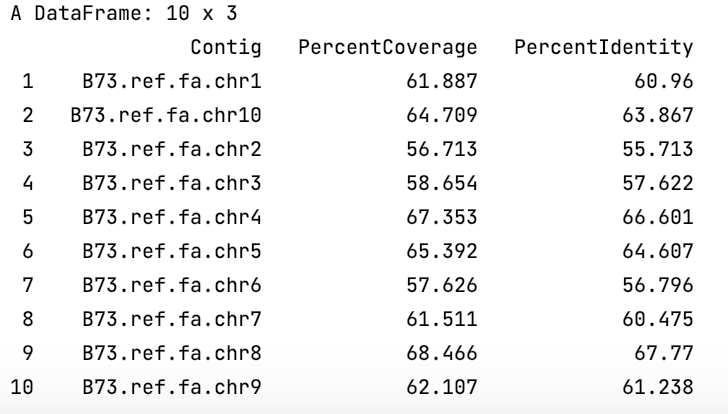



In [ ]:
// This test uses a very simple MAF that only has data for a single chromosome.
// Use a MAF of your own with multiple chromosomes to get fuller results

import krangl.DataFrame
import krangl.print
import biokotlin.genome.*

val mafFileSmallSeq = "../src/test/kotlin/biokotlin/data/LineA.maf"

// Get the coverage and identify dataframe
val covIdDF:DataFrame? = getCoverageIdentityPercentForMAF(mafFileSmallSeq)

// print the dataframe.  The !! is added as kotlin wants to know there is really data there.
// You could also put this code in a conditional and print if covIdDF is not null
println()
covIdDF!!.print()